In [30]:
from konlpy.tag import Okt
from collections import Counter
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import export_graphviz
import matplotlib.font_manager as fm
from matplotlib import rc
from pylab import plot, show
font_name = fm.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
plt.rc('font', family=font_name)
mpl.rcParams["axes.unicode_minus"] = False
from wordcloud import WordCloud
import nltk
from konlpy.tag import Okt

In [44]:
def wordcloud(Text):
    data = Text.vocab().most_common(100)

    wordcloud = WordCloud(font_path="C:/Windows/Fonts/malgun.ttf",
                          relative_scaling = 0.2,
                          #stopwords=STOPWORDS,
                          background_color='white',
                          ).generate_from_frequencies(dict(data))
    plt.figure(figsize=(12, 8))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

In [3]:
def showGraph(wordInfo):
    
    font_location = "c:/Windows/Fonts/malgun.ttf"
    font_name = fm.FontProperties(fname=font_location).get_name()
    rc('font', family=font_name)
    plt.figure(figsize=(15, 6))
    plt.xticks(fontsize=16)
    plt.rc('axes', labelsize=16)
    plt.xlabel('주요 단어')
    plt.ylabel('빈도수')
    plt.grid(True)
    
    Sorted_Dict_Values = sorted(wordInfo.values(), reverse=True)
    Sorted_Dict_Keys = sorted(wordInfo, key=wordInfo.get, reverse=True)

    plt.bar(range(len(wordInfo)), Sorted_Dict_Values, align='center')
    plt.xticks(range(len(wordInfo)), list(Sorted_Dict_Keys), rotation='70')

    plt.show()

In [41]:
def nouns(file):
    global text1, tokens, tokens1, stop_words, ingre_info
    df = pd.read_csv("data/{}.csv".format(file))
    
    # 평점 3이하 제거
    idx = df[df['point']<=3].index
    df = df.drop(idx)
    # 중복 제거
    df.dropna(inplace=True)
    df.drop_duplicates(['review'], keep = 'first', ignore_index=True, inplace=True)
    # date열 제거 (불필요하다고 판단)
    del df['date']
    # Unnamed: 0열 제거
    del df['Unnamed: 0']
    
    import nltk
    from konlpy.tag import Okt
    Okt=Okt()
    
    # 명사 추출 후 tokens에 저장
    df["noun"] = df["review"].apply(Okt.nouns)

    tokens = [take2 for take1 in df["noun"] for take2 in take1]
    text = nltk.Text(tokens, name="NMSC")
    
    # 불용어 처리 후 text1에 다시 저장
    stop_words = ['피부', '좋아요', '이니스프리', '제품', '구매', '사용', '것', '때', '거', '더', '용량', '일', '진짜', '저', '배송', '통째', '좀', '또',
              '임', '이', '항상', '보고', '아주', '정말', '정도', '구입', '통', '생각', '용', '형', '주문', '제', '템',
              '번', '전', '때문', '바로', '후', '요즘', '다음', '벌써', '날', '일단', '늘', '걸', '상품', '다른', '쟁',
              '끈', '감', '금방', '안', '중', '사서', '요']

    tokens1 = [each_word for each_word in tokens
              if each_word not in stop_words]
    text1 = nltk.Text(tokens1, name="NMSC")
    count = Counter(text1.vocab())
    
       
    # 빈도 저장 후 출력
    ingre_info = dict()
    for tags, counts in text1.vocab().most_common(30):
        if (len(str(tags)) > 1): 
            ingre_info[tags] = counts
            print("%s:%d" %(tags, counts))




### 머그워트

In [46]:
# 형태소 저장 및 빈도수 출력
nouns("final_mug")

진정:1596
효과:961
에센스:927
트러블:915
스킨:590
느낌:492
여드름:433
가격:423
화장:375
흡수:343
자극:336
추천:312
계속:289
보습:288
얼굴:263
토너:261
프롬:236
마스크:228
처음:207
쑥향:199
한번:184
냄새:178
쓰기:177
좁쌀:169
할인:164


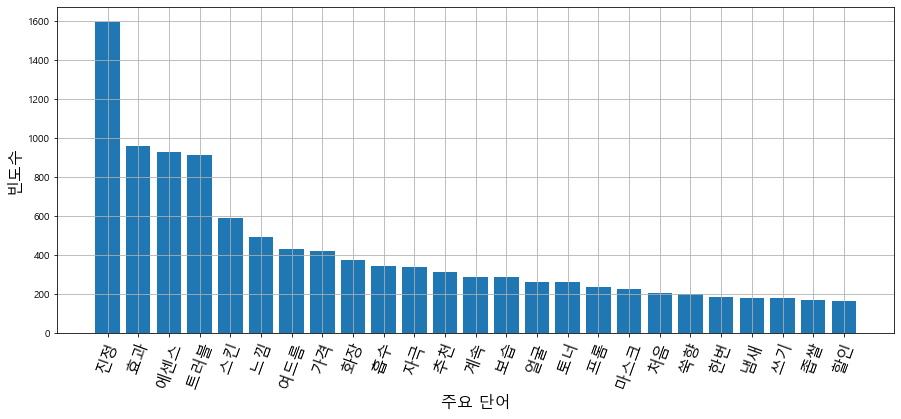

In [47]:
# 빈도 그래프
showGraph(ingre_info)

In [48]:
"""

진정 - 머그워트는 피부 진정에 관한 제품이라고 볼 수 있다.
효과 - 리뷰 포인트 4점 이상 기준 효과가 좋다라고 볼 수 있다.
에센스 - 에센스로도 출시되는 상품이다.
트러블 - 트러블에 효과가 있는 제품이라고 볼 수 있다.
팩 - 팩으로도 출시되는 상품이다.
쑥 - 머그워트가 영어로 쑥이라고 한다.
스킨 - 스킨으로도 출시되는 상품이다.
느낌 - 구매자들이 느낌을 어느정도 중요시 한다.
향 - 구매자들이 향을 어느정도 중요시 한다.
여드름 - 여드름에 관련된 상품이라고 생각 할 수 있다.
흡수 - 흡수에 대한 효과가 있다라고 볼 수 있다.
자극 - 자극이 어느정도 언급되었다.
보습 - 보습에 관련된 상품이라고 생각할 수 있다.
"""

'\n피부 - 당연하지만 피부에 관한 제품이다.\n진정 - 머그워트는 피부 진정에 관한 제품이라고 볼 수 있다.\n효과 - 리뷰 포인트 4점 이상 기준 효과가 좋다라고 볼 수 있다.\n에센스 - 에센스로도 출시되는 상품이다.\n트러블 - 트러블에 효과가 있는 제품이라고 볼 수 있다.\n팩 - 팩으로도 출시되는 상품이다.\n쑥 - 머그워트가 영어로 쑥이라고 한다.\n스킨 - 스킨으로도 출시되는 상품이다.\n느낌 - 구매자들이 느낌을 어느정도 중요시 한다.\n향 - 구매자들이 향을 어느정도 중요시 한다.\n여드름 - 여드름에 관련된 상품이라고 생각 할 수 있다.\n흡수 - 흡수에 대한 효과가 있다라고 볼 수 있다.\n자극 - 자극이 어느정도 언급되었다.\n보습 - 보습에 관련된 상품이라고 생각할 수 있다.\n'

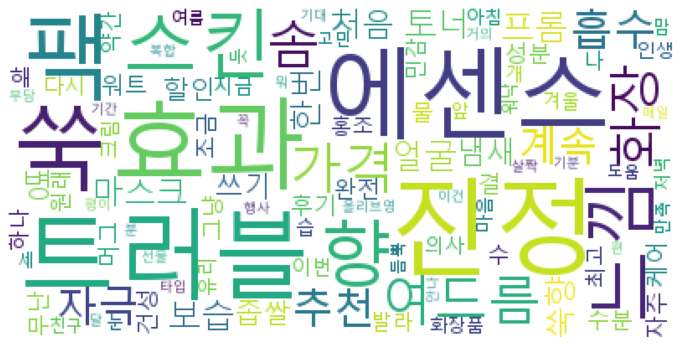

In [49]:
# 워드 클라우드
wordcloud(text1)

### 프로폴리스


In [50]:
# 형태소 저장 및 빈도수 출력
nouns("final_propol")

앰플:3415
흡수:3293
트러블:2077
느낌:2062
프로폴리스:1580
겨울:1336
가격:1299
수분:1265
추천:1166
건조:1138
건성:1106
크림:1098
보습:1077
쫀쫀:1026
토너:1024
처음:1013
계속:1013
효과:998
화장:855
쓰기:834
얼굴:781
스킨:750
아침:682
행사:662
조금:650
발라:625
한번:606
적임:550


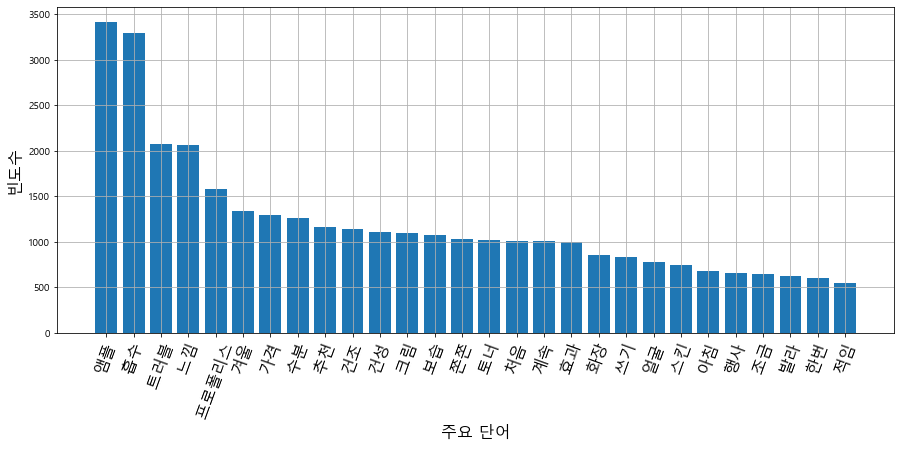

In [51]:
# 빈도 그래프
showGraph(ingre_info)

In [52]:
"""
흡수 - 흡수가 잘되는 제품이라고 추측 해 볼 수 있다.
트러블 - 트러블에 효과가 있는 제품이라고 볼 수 있다.
느낌 - 특별한 느낌이 있다고 생각해 볼 수 있다.
프로폴리스 - 성분의 이름이다.
겨울 - 겨울피부과 관련이 있다고 생각해 볼 수 있다.(건조)
가격 - 가격을 신경쓰는 사람들이 꽤나 있다.
수분 - 수분에 관련된 제품이라고 생각해 볼 수 있다.(겨울과 연관)
건조, 건성 - 피부가 건조한 구매자가 꽤나 있다고 추측해 볼 수 있다.
보습 - 보습에 관련된 제품이라고 생각해 볼 수 있다.(겨울 수분 건조 건성 과 연관)
쫀쫀 - 쫀쫀한 느낌이 있다라고 볼 수 있다.
"""

'\n피부 - 피부에 관련된 제품이다.\n흡수 - 흡수가 잘되는 제품이라고 추측 해 볼 수 있다.\n트러블 - 트러블에 효과가 있는 제품이라고 볼 수 있다.\n느낌 - 특별한 느낌이 있다고 생각해 볼 수 있다.\n프로폴리스 - 성분의 이름이다.\n겨울 - 겨울피부과 관련이 있다고 생각해 볼 수 있다.(건조)\n가격 - 가격을 신경쓰는 사람들이 꽤나 있다.\n수분 - 수분에 관련된 제품이라고 생각해 볼 수 있다.(겨울과 연관)\n건조, 건성 - 피부가 건조한 구매자가 꽤나 있다고 추측해 볼 수 있다.\n보습 - 보습에 관련된 제품이라고 생각해 볼 수 있다.(겨울 수분 건조 건성 과 연관)\n쫀쫀 - 쫀쫀한 느낌이 있다라고 볼 수 있다.\n'

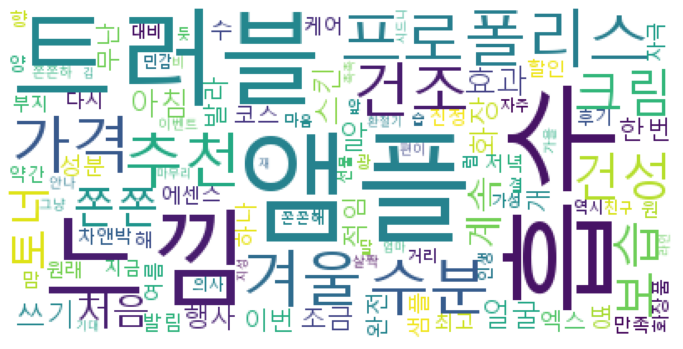

In [53]:
# 워드 클라우드
wordcloud(text1)

### 나이아신아마이드


In [54]:
# 형태소 저장 및 빈도수 출력
nouns("final_niasin")

앰플:1929
느낌:1361
블랙:1128
흡수:1010
샘플:768
효과:759
아침:720
크림:658
체험:596
이벤트:560
가격:501
얼굴:497
보습:497
저녁:478
트러블:436
수분:397
발림:394
겨울:393
발라:366
계속:358
추천:358
처음:341
세트:327


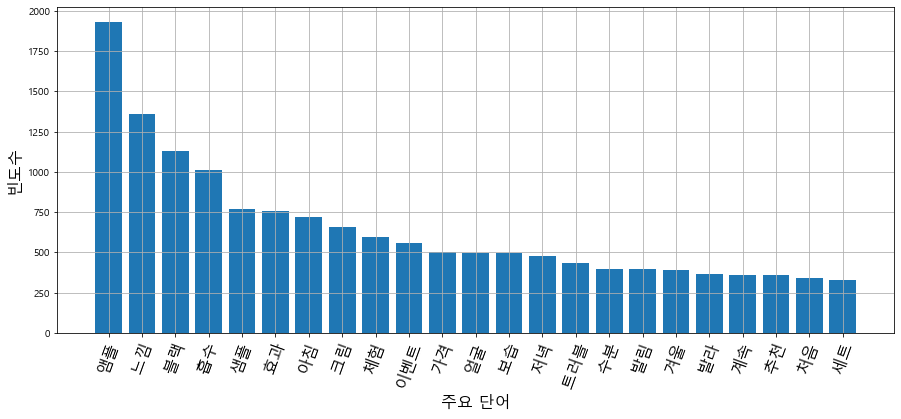

In [55]:
# 빈도 그래프
showGraph(ingre_info)

In [56]:
"""

느낌 - 구매자들은 느낌을 꽤나 중요시한다.
블랙 - 제품 색상을 유추해 볼 수 있다.
티 - ?
흡수 - 흡수에 관해 효과가 있는 제품이라고 추측할 수 있다.
향 - 향을 꽤나 언급했다.
아침 - 아침에 사용하는 사람이 꽤나 있다.
보습 - 보습에 관해 효과가 있는 제품이라고 추측할 수 있다.
저녁 - 
트러블 - 트러블과 관련된 상품이라고 볼 수 있다.
수분 - 수분에 관해 효과가 있는 제품이라고 볼 수 있다.
겨울 - 겨울과 관련된 제품이라고 생각할 수 있다.(보습, 수분과 연관)
"""

'\n\n느낌 - 구매자들은 느낌을 꽤나 중요시한다.\n블랙 - 제품 색상을 유추해 볼 수 있다.\n티 - ?\n흡수 - 흡수에 관해 효과가 있는 제품이라고 추측할 수 있다.\n향 - 향을 꽤나 언급했다.\n아침 - 아침에 사용하는 사람이 꽤나 있다.\n보습 - 보습에 관해 효과가 있는 제품이라고 추측할 수 있다.\n저녁 - \n트러블 - 트러블과 관련된 상품이라고 볼 수 있다.\n수분 - 수분에 관해 효과가 있는 제품이라고 볼 수 있다.\n겨울 - 겨울과 관련된 제품이라고 생각할 수 있다.(보습, 수분과 연관)\n'

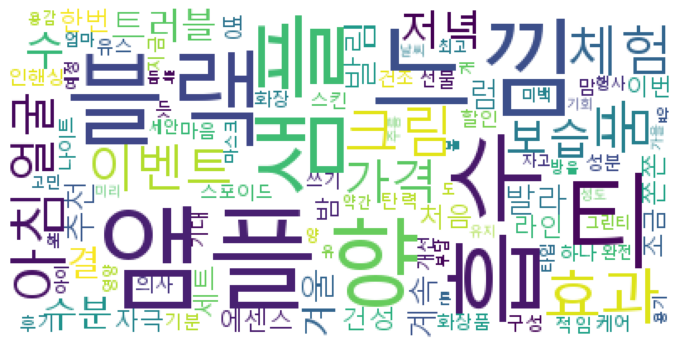

In [57]:
# 워드 클라우드
wordcloud(text1)